# Titanic Dataset: Preprocesamiento

Veamos un ejemplo de preprocesamiento sobre el dataset del famoso barco hundido en el año 1912, el Titanic.

El dataset brinda información sobre los pasajeros del Titanic, como sus edades, género, número de hermanos, esposas, hijos, padres dentro del barco, puntos de embarque y si sobrevivieron o no al desastre.

En base a estas características, el objetivo de un posible proyecto de Machine Learning podría ser predecir si un pasajero arbitrario en el Titanic sobreviviría o no al hundimiento.

En este primer ejemplo vamos a analizar el dataset, entendiendo mejor los features que lo componen, observando relaciones entre ellos, buscando errores, datos faltantes, entre otros.


In [ ]:
#Importamos todas las librerias necesarias para resolver el problema
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

# Codigo para definir el estilo de los graficos de matplotlib
style.use('fivethirtyeight')
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)

Ahora podemos levantar en un pandas.DataFrame el archivo donde se encuentra el dataset y observar los primeros ejemplos.

In [ ]:
# Leemos el archivo .csv
# ATENCION: REEMPLAZAR POR EL PATH DONDE SE ENCUENTRE EL ARCHIVO
titanic=pd.read_csv('/content/titanic.csv')

# Observamos los 5 primeros elementos
titanic.head()

FileNotFoundError: [Errno 2] No such file or directory: '/root/titanic.csv'

##### Observaciones
Lo primero que observamos cuando vemos los primeros ejemplos del dataset es que tenemos features numéricos, de texto libre y categóricos.

Además vemos que tenemos un feature llamado PassengerId que podría usarse de indíce en nuestro DataFrame.

El Label en este caso sería 'Survived' que nos dice si ese pasajero sobrevivió (1) o no sobrevivió (0). El resto de las columnas son los features de los cuales debemos aprender.

Veamos que significa cada feature:
- PassengerId, es un valor unico por pasajero que define su ID
- Pclass, es la clase en la que viajaba (1, para primera clase, 2, para segunda clase y 3 para tercera clase)
- Name, es el nombre completo del pasajero. Inlcuye el título social (Mr., Miss., etc)
- Sex, es el género (masculino, femenino)
- Age, la edad
- SibSp, describe la cantidad de hermanos/as y esposo/a que viajan también en el barco
- Parch, describe la cantidad de padres e hijos que viajan también en el barco
- Ticket, es el identificador del pasaje
- Fare, es la tarifa que pagó por el pasaje
- Cabin, es el identificador de la cabina en la que se alojaba
- Embarked, es el puerto de embarque en donde subió al barco. Tiene tres valores posibles: S (Southampton), C (Cherbourg) y Q (Queenstown).

Ahora que tenemos una idea general de como esta formado nuestro dataset, comencemos a analizarlo y procesarlo para que quede "listo" para entrenar un algoritmo de ML.


Para iniciar con nuestro análisis, a continuación vamos a:
1. definir PassengerId como indice de nuestro DataFrame
2. observar la cantidad de ejemplos que tenemos
3. analizar los tipos de datos que representan los features
4. describir estadeisticamente el dataset usando el método .describe()
5. consultar la cantidad de valores faltantes por cada feature
6. observar el Label: cantidad de sobrevivientes y cantidad de fallecidos



In [ ]:
# 1. Seteamos en indice para que sea el id del pasajero
titanic = titanic.set_index('PassengerId')

# Observamos los 5 ultimos elementos
titanic.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


###### Veamos cuántos ejemplos tenemos y cuántos features

In [ ]:
# 2. Observamos el tamaño del dataset (Filas x Columnas)
titanic.shape

(891, 11)

In [ ]:
# 3. Analizamos los tipos de los features que componen el dataset
titanic.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

##### Observaciones:
- Name, Sex, Ticket y Cabin, Embarked son del tipo object, es decir, texto o valores categóricos
- Age y Fare son del tipo float (numéricos reales)
- El resto son valores numéricos enteros

In [ ]:
# 4. Analizamos estadísticamente los features numéricos. transpose() es para visualizar la matriz transpuesta (puede obviarse)
titanic.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
# 5. Consultamos la cantidad de valores faltantes por cada feature
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

##### Observaciones
- Cabin tiene 687 valores faltantes de los 891 ejemplos (~77%)
- Age tiene 177 valores faltantes de los 891 ejemplos (~20%)

In [ ]:
# 6. Observamos el Label: Cantidad de sobrevivientes y cantidad de fallecidos
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

 ##### Observaciones
 Del total de pasajeros del dataset:
 - 549 no sobrevivieron
 - 342 sobrevivieron

Ahora que tenemos más claridad sobre nuestro dataset usaremos algunos métodos de pandas que nos ayudarán a analizar los features combinandolos.

Con el método .groupby() se agrupan segun los features seleccionados y permite realizar diferentes cálculos de a grupos (contar los elementos agrupados, sumarlos, promediarlos, etc).

En este caso el objetivo es:
1. Obtener la cantidad de pasajeros por cada clase
2. Obtener la cantidad de sobrevivientes por cada clase

Nos enfocamos en principio en las clases de las cabinas porque, según la historia que se conoce del hundimiento del Titanic, los pasajeros de clases más bajas tuvieron menos chances de sobrevivir. El objetivo es verificar esto con nuestro dataset. Si ese es el caso sabremos que Pclass es un feature importante para definir el Label.

In [ ]:
# Observamos la cantidad de pasajeros por clase. Para ello agrupamos Pclass, junto con el Label
# En este caso se usa count(), que cuenta la cantidad de ejemplos por cada grupo
titanic[['Pclass', 'Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


##### Observaciones
Total de pasajeros por clase:
- 216 pasajeros de 1ra clase
- 184 pasajeros de 2da clase
- 491 pasajeros de 3ra clase

In [ ]:
# Cantidad de sobrevivientes por clase
# En este caso se usa sum(), porque sumamos porque los valores del feature Survived
# Survived tiene valores de 0 (no sobrevivio), y 1 (sobrevivio).
# Por lo tanto sum() nos dará la cantidad que sobrevivieron, sumando solo los unos.
titanic[['Pclass', 'Survived']].groupby('Pclass').sum()

,Survived
Pclass,
1,136
2,87
3,119


##### Observaciones
- 136 pasajeros sobrevivieron de 1ra clase
- 87 pasajeros sobrevivieron de 2da clase
- 119 pasajeros sobrevivieron de 3ra clase

Ahora que vemos en números las cantidades de pasajeros de cada clase, y los que sobrevivieron vamos a visualizar gráficamente estás estadísticas usando la librería matplotlib

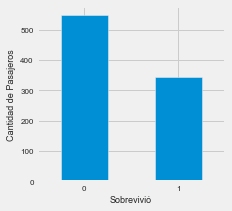

In [ ]:
# Vemos gráficamente cantidad de pasajeros que sobrevivieron y que no lo hicieron

# Fijamos el tamaño del grafico que va a contener los subgraficos
plt.figure(figsize=(3,3))

# El grafico es del tipo Bar (gráfico de Barras)
figure=titanic.Survived.value_counts().plot(kind='bar')

# Fijamos en 0 el valor de rotación de los ticks del eje x para su mejor visualización (por defecto es 90 grados)
plt.xticks(rotation = 0)

# Definimos los labels para cada eje
figure.set_xlabel('Sobrevivió',fontsize=9)
figure.set_ylabel('Cantidad de Pasajeros', fontsize=9)
plt.show()

Veamos ahora gráficamente la cantidad de pasajeros en relación a los features:
- Clase de la cabina
- Género
- Puerto de embarque
- Cant. de Hermanos y/o Esposos
- Cant. de Padres y/o Hijos

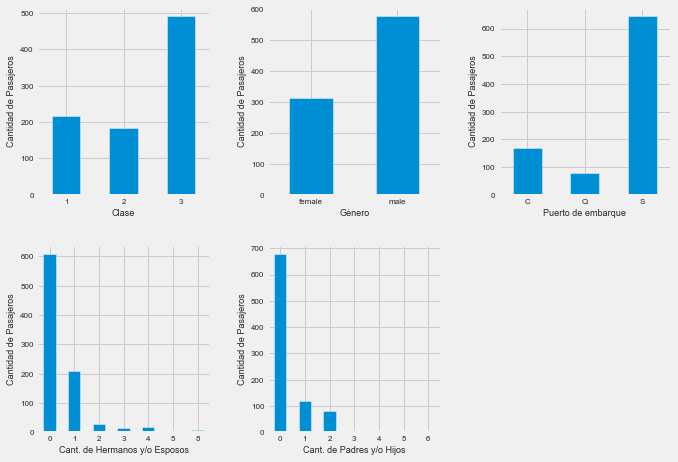

In [ ]:
# Vemos graficamente la cantidad de pasajeros en relación a otros features

# Fijamos el tamaño del grafico que va a contener los subgraficos
plt.figure(figsize=(10,7))


# Grafico 1: Cantidad de pasajeros vs. Clase
# Con plt.subplot() Ubicamos el primer gráfico (el primer y segundo argumento de subplot define el tamaño
# de la grilla que contiene los subgraficos, en este caso 2x3). El ultimo argumento define el indice donde
# ira ubicado el grafico. En este caso es el primero (arriba a la izquierda)
plt.subplot(2,3,1)
figure = titanic.Pclass.value_counts().sort_index().plot(kind='bar', title='')
plt.xticks(rotation = 0)
figure.set_xlabel('Clase',fontsize=9)
figure.set_ylabel('Cantidad de Pasajeros', fontsize=9)

# Grafico 2: Cantidad de pasajeros vs. Género
plt.subplot(2,3,2)
figure = titanic.Sex.value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation = 0)
figure.set_xlabel('Género',fontsize=9)
figure.set_ylabel('Cantidad de Pasajeros',fontsize=9)


# Grafico 3: Cantidad de pasajeros vs. Puerto de embarque
plt.subplot(2,3,3)
figure = titanic.Embarked.value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation = 0)
figure.set_xlabel('Puerto de embarque',fontsize=9)
figure.set_ylabel('Cantidad de Pasajeros',fontsize=9)

# Grafico 3: Cantidad de pasajeros vs. Cant. de Hermanos y/o Esposos
plt.subplot(2,3,4)
figure = titanic.SibSp.value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation = 0)
figure.set_xlabel('Cant. de Hermanos y/o Esposos',fontsize=9)
figure.set_ylabel('Cantidad de Pasajeros',fontsize=9)


# Grafico 3: Cantidad de pasajeros vs. Cant. de Padres y/o Hijos
plt.subplot(2,3,5)
figure = titanic.Parch.value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation = 0)
figure.set_xlabel('Cant. de Padres y/o Hijos',fontsize=9)
figure.set_ylabel('Cantidad de Pasajeros',fontsize=9)

# Dejamos espacio entre los graficos para mayor legibilidad
plt.tight_layout(pad=2.0)
plt.show()

Puntualmente lo que nos interesa es observar la probabilidad de sobrevivir segun cada feature. Analicemos esto según los siguientes features:
- Clase de la cabina
- Género
- Puerto de embarque
- Cant. de Hermanos y/o Esposos
- Cant. de Padres y/o Hijos

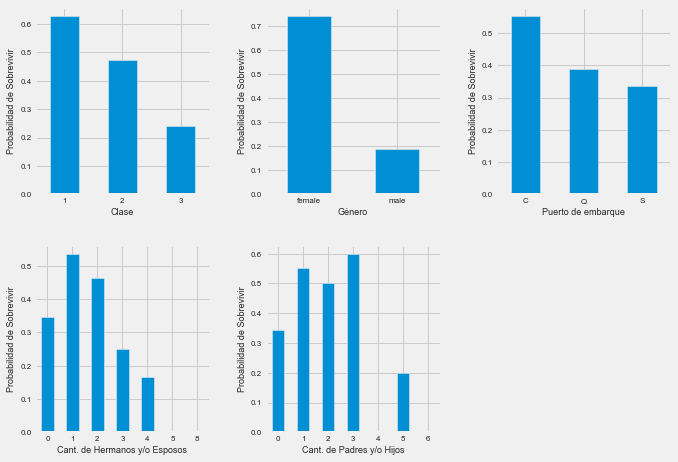

In [ ]:
# Vemos gráficamente la probabilidad de sobrevivir en relación a otros features
plt.figure(figsize=(10,7))

# Grafico 1: Probabilidad de Sobrevivir vs. Clase
plt.subplot(2,3,1)
figure = titanic[['Pclass', 'Survived']].groupby('Pclass').mean().Survived.plot(kind='bar')
plt.xticks(rotation = 0)
figure.set_xlabel('Clase',fontsize=9)
figure.set_ylabel('Probabilidad de Sobrevivir',fontsize=9)

# Grafico 2: Probabilidad de Sobrevivir vs. Género
plt.subplot(2,3,2)
figure = titanic[['Sex', 'Survived']].groupby('Sex').mean().Survived.plot(kind='bar')
plt.xticks(rotation = 0)
figure.set_xlabel('Género',fontsize=9)
figure.set_ylabel('Probabilidad de Sobrevivir',fontsize=9)

# Grafico 3: Probabilidad de Sobrevivir vs. Puerto de embarque
plt.subplot(2,3,3)
figure = titanic[['Embarked', 'Survived']].groupby('Embarked').mean().Survived.plot(kind='bar')
plt.xticks(rotation = 0)
figure.set_xlabel('Puerto de embarque',fontsize=9)
figure.set_ylabel('Probabilidad de Sobrevivir',fontsize=9)

# Grafico 4: Probabilidad de Sobrevivir vs. Cant. de Hermanos y/o Esposos
plt.subplot(2,3,4)
figure = titanic[['SibSp', 'Survived']].groupby('SibSp').mean().Survived.plot(kind='bar')
plt.xticks(rotation = 0)
figure.set_xlabel('Cant. de Hermanos y/o Esposos',fontsize=9)
figure.set_ylabel('Probabilidad de Sobrevivir',fontsize=9)

# Grafico 5: Probabilidad de Sobrevivir vs. Cant. de Padres y/o Hijos
plt.subplot(2,3,5)
figure = titanic[['Parch', 'Survived']].groupby('Parch').mean().Survived.plot(kind='bar')
plt.xticks(rotation = 0)
figure.set_xlabel('Cant. de Padres y/o Hijos',fontsize=9)
figure.set_ylabel('Probabilidad de Sobrevivir',fontsize=9)

plt.tight_layout(pad=2.0)
plt.show()

### Feature Selection
Luego de haber analizado gráficamente algunas combinaciones de features vamos a hacer selección de features.
Para ello, eliminamos  aquellos que tienen muchos valores faltantes o aquellos que no consideramos de utilidad para el problema:
- Cabin se elimina porque tiene demasiados valores faltantes
- Ticket (Id de ticket) se elimina por no considerarse relevante

In [ ]:
# Con el método drop podemos eliminar filas o columnas. Para borrado de columnas se pasa como parámetro: axis=1
# TENER EN CUENTA: Una vez que se ejecutó esta celda, si se vuelve a ejecutar arrojará error, porque las
# columnas ya fueron eliminadas del DataFrame!
titanic = titanic.drop(['Ticket', 'Cabin'], axis=1)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


### Extracción de Features
Una forma de hacer extracción de features es manualmente crear nuevas features con algunas existentes en el dataset en este caso vamos a crear dos features nuevas:
- FamilySize, que es una combinación de 'SibSp' (cantidad de hermanos y/o esposa/o) y 'Parch' (cantidad de padres y/o hijos)
- Title, para la cual extraeremos del feature Name el título social del pasajero (el nombre lo descartamos porque consideramos que no aporta información relevante)

In [ ]:
# FamilySize se compone de la cantidad de parientes en el barco + 1 (el pasajero del ejemplo)
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [ ]:
# para crear Title se extrae el título social del nombre del pasajero
titanic['Title'] = titanic.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
# Se elimina el feature Name
titanic = titanic.drop(columns='Name')
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,2,Mr
2,1,1,female,38.0,1,0,71.2833,C,2,Mrs
3,1,3,female,26.0,0,0,7.9250,S,1,Miss
4,1,1,female,35.0,1,0,53.1000,S,2,Mrs
5,0,3,male,35.0,0,0,8.0500,S,1,Mr


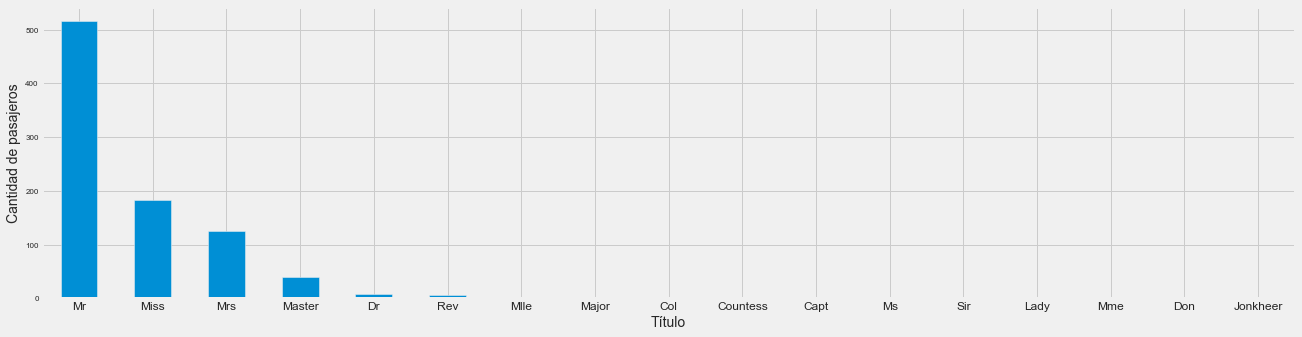

In [ ]:
# Vemos graficamente como quedó el feature Title
plt.figure(figsize=(20,5))
figure = titanic.Title.value_counts().plot(kind='bar')
plt.xticks(rotation=0, fontsize=12)
figure.set_xlabel('Título',fontsize=14)
figure.set_ylabel('Cantidad de pasajeros',fontsize=14)
plt.show()

Como tenemos demasiadas clases con pocos ejemplos vamos a combinar algunas de ellas y agrupar a los casos de títulos "raros" en "Others_titles". Además corregimos algunos errores.


In [ ]:
# Corregimos errrores y creamos la categoría 'others_titles'
titanic['Title'] = titanic['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others_Titles')
titanic['Title'] = titanic['Title'].replace('Ms', 'Miss')
titanic['Title'] = titanic['Title'].replace('Mme', 'Mrs')
titanic['Title'] = titanic['Title'].replace('Mlle', 'Miss')
titanic.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,2,Mr
2,1,1,female,38.0,1,0,71.2833,C,2,Mrs
3,1,3,female,26.0,0,0,7.9250,S,1,Miss
4,1,1,female,35.0,1,0,53.1000,S,2,Mrs
5,0,3,male,35.0,0,0,8.0500,S,1,Mr


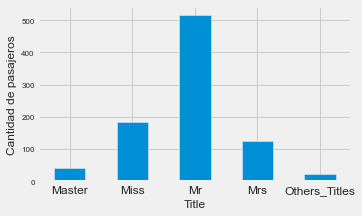

In [ ]:
plt.figure(figsize=(5,3))
figure = titanic.Title.value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0, fontsize=12)
figure.set_xlabel('Title', fontsize=12)
figure.set_ylabel('Cantidad de pasajeros', fontsize=12)
plt.show()

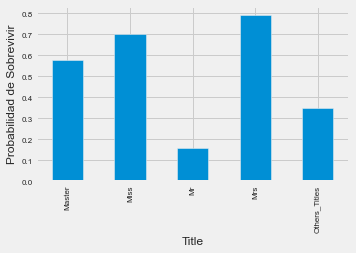

In [ ]:
plt.figure(figsize=(5,3))
figure = titanic[['Title', 'Survived']].groupby('Title').mean().Survived.plot(kind='bar')
figure.set_xlabel('Title', fontsize=12)
figure.set_ylabel('Probabilidad de Sobrevivir', fontsize=12)
plt.show()

### Manejo de valores faltantes:  'Age' y 'Embarked'

Analicemos ahora los features con valores faltantes: 'Age' y 'Embarked'

In [ ]:
# Cantidad de valores faltantes de Age
titanic['Age'].isnull().sum()

177

En el caso de 'Age' vamos a llenar los valores faltantes con la edad promedio de las personas que no sobrevivieron

In [ ]:
#Buscamos la edad promedio de los pasajeros que no sobrevivieron
titanic['Age'] = titanic.Age.fillna(titanic[titanic.Survived==0].Age.mean())

In [ ]:
# Cantidad de valores faltantes de Embarked
titanic['Embarked'].isnull().sum()

2

In [ ]:
# Analizamos estadisticamente el feature Embarked
titanic['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

- Vemos que de los 889 valores, hay 3 clases unicas y la que más se repite es el puerto de S (Southampton). Vamor a usar este valor para completar los faltantes

In [ ]:
common_value = 'S'
titanic['Embarked'] = titanic['Embarked'].fillna(common_value)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,2,Mr
2,1,1,female,38.0,1,0,71.2833,C,2,Mrs
3,1,3,female,26.0,0,0,7.9250,S,1,Miss
4,1,1,female,35.0,1,0,53.1000,S,2,Mrs
5,0,3,male,35.0,0,0,8.0500,S,1,Mr


In [ ]:
titanic.isnull().sum()


Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
Title         0
dtype: int64

### Manejo de features categóricos:  'Sex', 'Embarked', 'Pclass' y 'Title'

La mayoría de los algoritmos de ML no pueden manejar datos categeoricos. Es por ello que hay que pasarlos a valores numéricos. Analicemos los features categóricos presentes en el dataset.

Para la visualización de features categóricos la librería Seaborn ofrece un gráfico, conocida como catplot(), que permite comparar valores categóricos en tan sólo una línea de código.

Analicemos todos los pares de features categóricos del dataset (algunos ofrecen más información que otros)


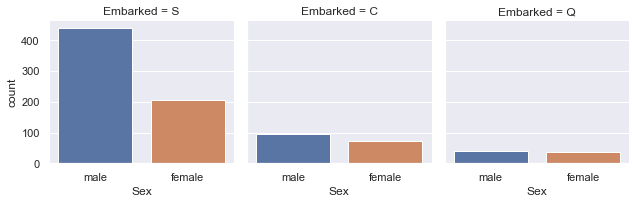

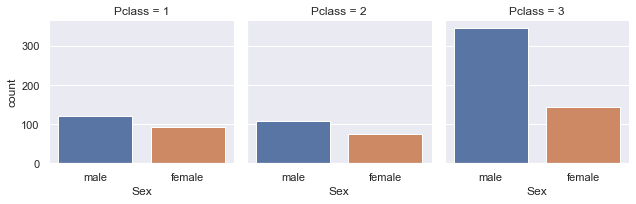

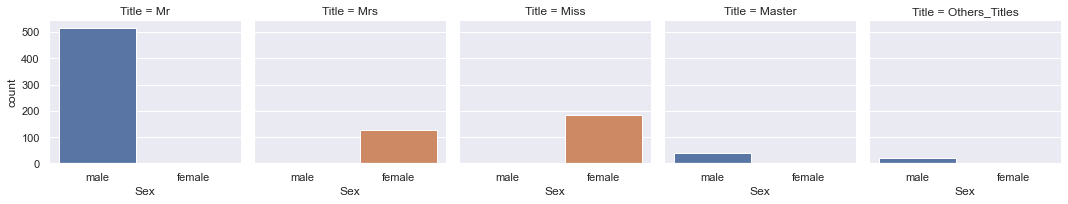

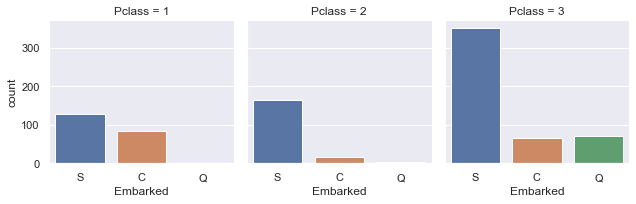

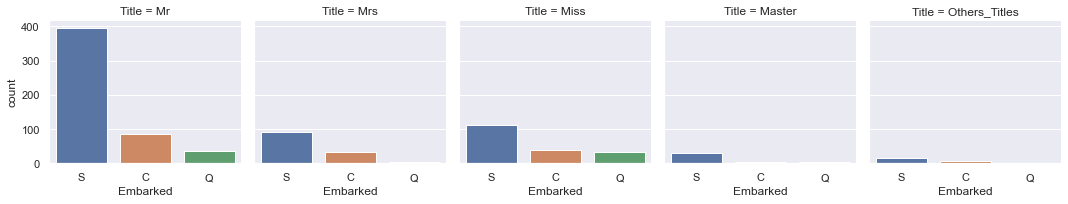

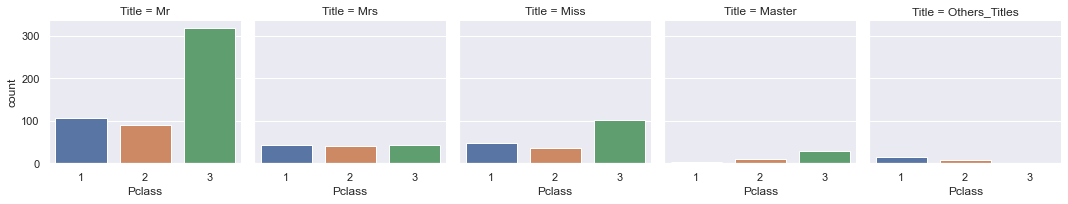

In [ ]:
sns.set(font_scale=1)

# Combinamos todos los pares de features categóricos
sns.catplot(x='Sex', col = 'Embarked', data = titanic, kind = 'count', height=3)
sns.catplot(x='Sex', col = 'Pclass', data = titanic, kind = 'count', height=3)
sns.catplot(x='Sex', col = 'Title', data = titanic, kind = 'count', height=3)

sns.catplot(x='Embarked', col='Pclass', data=titanic, kind='count', height=3)
sns.catplot(x='Embarked', col='Title', data=titanic, kind='count', height=3)

sns.catplot(x='Pclass', col='Title', data=titanic, kind='count', height=3)


##### One-hot encoding
Lo primero que vamos a hacer para el manejo de features categoricos es utilizar la técnica de one-hot encoding para 'Sex', 'Embarked' y 'Title'

In [ ]:
# El método get_dummies de pandas nos simplifica la tarea de hace one-hot encoding en valores categóricos
# El primer parámetro define el nombre del feature categórico
male_female_df = pd.get_dummies(titanic.Sex)

# Renombramos las columnas generadas para unificar formato con el resto
male_female_df.rename(columns = {'male':'Male', 'female':'Female'}, inplace = True)

# Concatenamos las nuevas columnas a nuestro dataset
titanic = pd.concat([titanic, male_female_df], axis=1)

titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title,Female,Male
PassengerId,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,2,Mr,0,1
2,1,1,female,38.0,1,0,71.2833,C,2,Mrs,1,0
3,1,3,female,26.0,0,0,7.9250,S,1,Miss,1,0
4,1,1,female,35.0,1,0,53.1000,S,2,Mrs,1,0
5,0,3,male,35.0,0,0,8.0500,S,1,Mr,0,1


In [ ]:
# Hacemos lo mismo para la feature 'Embarked'
embarked_df = pd.get_dummies(titanic.Embarked, prefix='Embarked')
titanic = pd.concat([titanic, embarked_df], axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title,Female,Male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,2,Mr,0,1,0,0,1
2,1,1,female,38.0,1,0,71.2833,C,2,Mrs,1,0,1,0,0
3,1,3,female,26.0,0,0,7.9250,S,1,Miss,1,0,0,0,1
4,1,1,female,35.0,1,0,53.1000,S,2,Mrs,1,0,0,0,1
5,0,3,male,35.0,0,0,8.0500,S,1,Mr,0,1,0,0,1


In [ ]:
# Finalmente, aplicamos one-hot encoding en el feature 'Title'
title_df = pd.get_dummies(titanic.Title)
titanic = pd.concat([titanic, title_df], axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title,Female,Male,Embarked_C,Embarked_Q,Embarked_S,Master,Miss,Mr,Mrs,Others_Titles
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,2,Mr,0,1,0,0,1,0,0,1,0,0
2,1,1,female,38.0,1,0,71.2833,C,2,Mrs,1,0,1,0,0,0,0,0,1,0
3,1,3,female,26.0,0,0,7.9250,S,1,Miss,1,0,0,0,1,0,1,0,0,0
4,1,1,female,35.0,1,0,53.1000,S,2,Mrs,1,0,0,0,1,0,0,0,1,0
5,0,3,male,35.0,0,0,8.0500,S,1,Mr,0,1,0,0,1,0,0,1,0,0


In [ ]:
titanic = titanic.drop(columns='Embarked')
titanic = titanic.drop(columns='Title')
titanic = titanic.drop(columns='Sex')


### Análisis de Correlación

Por último, vamos a realizar un análisis de correlación entre los distintos features numéricos buscando features innecesarios por estar altamente correlacionados con otros. Además podemos observar cuales son los features que mayor correlación presentan con el Label

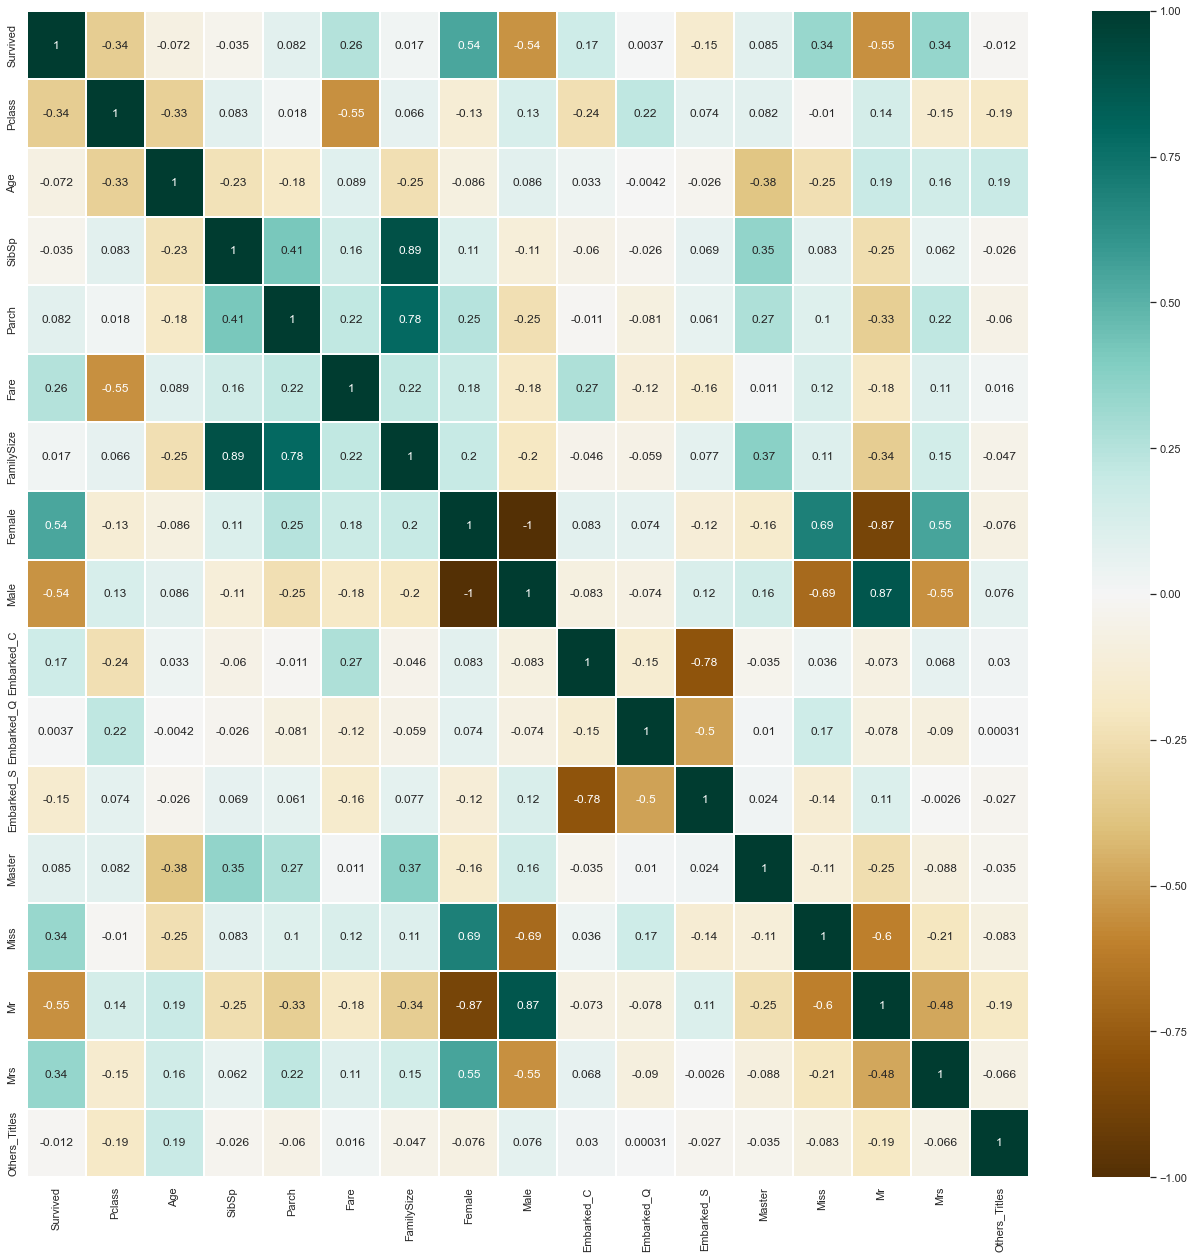

In [ ]:
corr_matrix = titanic.corr(numeric_only=True)
plt.figure(figsize=(20, 20))
sns.heatmap(data = corr_matrix,cmap='BrBG', annot=True, linewidths=0.2)
plt.show()

Como es de esperar, SibSp y Parch estan altamente correlacionados con lel feature creado FamilySize.
Es por ello que vamos a eliminar estos features y dejamos solamente la creada por nosotros

In [ ]:
titanic = titanic.drop(columns=['SibSp', 'Parch'])

In [ ]:
titanic.head()

,Survived,Pclass,Age,Fare,FamilySize,Female,Male,Embarked_C,Embarked_Q,Embarked_S,Master,Miss,Mr,Mrs,Others_Titles
PassengerId,,,,,,,,,,,,,,,
1,0,3,22.0,7.2500,2,0,1,0,0,1,0,0,1,0,0
2,1,1,38.0,71.2833,2,1,0,1,0,0,0,0,0,1,0
3,1,3,26.0,7.9250,1,1,0,0,0,1,0,1,0,0,0
4,1,1,35.0,53.1000,2,1,0,0,0,1,0,0,0,1,0
5,0,3,35.0,8.0500,1,0,1,0,0,1,0,0,1,0,0


Al final del preprocesamiento tenemos un dataset con todos los features numéricos, lo que nos va a permitir utilizar la mayoría de las técnicas de Machine Learning

Ahora que tenemos un dataset preprocesado podemos dividirlo en: dataset de entrenamiento, dataset de validación y dataset de testeo.

In [ ]:
# Separamos X (los features) de y (el label)
label = ['Survived']
features = titanic.columns.values[titanic.columns.values !='Survived']
X = titanic[features]
y = titanic[label]

In [ ]:
X.head()

,Pclass,Age,Fare,FamilySize,Female,Male,Embarked_C,Embarked_Q,Embarked_S,Master,Miss,Mr,Mrs,Others_Titles
PassengerId,,,,,,,,,,,,,,
1,3,22.0,7.2500,2,0,1,0,0,1,0,0,1,0,0
2,1,38.0,71.2833,2,1,0,1,0,0,0,0,0,1,0
3,3,26.0,7.9250,1,1,0,0,0,1,0,1,0,0,0
4,1,35.0,53.1000,2,1,0,0,0,1,0,0,0,1,0
5,3,35.0,8.0500,1,0,1,0,0,1,0,0,1,0,0


In [ ]:
y.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


A continuación importamos el método train_test_split() de Scikit-Learn que facilita el proceso de división del dataset.

Dado que el método train_test_split() solamente divide el dataset en dos (un dataset de entrenamiento y otro de testing) y nosotros queremos tener además un dataset más para realizar la validación de nuestro algortimo antes de hacer el testo final, en este ejemplo utilizamos el método dos veces:
- Primero, sobre nuestro dataset original para obtener el dataset de entrenamiento (que comprende el 80% de los datos)
- Luego, de ese 80% volvemos a dividir en dos para obtener un 20% más y reservarlo para validación.

Es decir, reservamos un 60% para entrenamiento, un 20% para validación y un 20% para testeo.


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [ ]:
print('Tamaño de X_train:', X_train.shape,'- y_train:', y_train.shape)
print('Tamaño de X_val:',X_val.shape,'- y_val:', y_val.shape)
print('Tamaño de X_test:',X_test.shape,'- y_test:', y_test.shape)

Tamaño de X_train: (534, 14) - y_train: (534, 1)
Tamaño de X_val: (178, 14) - y_val: (178, 1)
Tamaño de X_test: (179, 14) - y_test: (179, 1)


### Conclusiones

En este ejemplo usamos el dataset del Titanic para hacer el preprocesamiento de los datos. Analizamos sus features, filtramos aquellos que presentaban muchos valores faltantes, seleccionamos los más relevantes, creamos nuevos features en base a los existentes.

Analizamos las correlaciones entre los distintos features y entre el label. Además analizamos graficamente las estadisticas de los distintos features, en relacion al Label y a otros features. Trabajamos con features categóricos y usamos One-Hot Encoding para poder usarlos en algortimos de ML que sólo funcionan con datos numéricos.

Finalmente, dividimos el dataset en training, dev (o validation), testing y dejamos todo listo para poder desarrollar un algoritmo de ML que sea capaz de predecir nuestro Label.